In [2]:
import os
import mne
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, permutation_test

# Functions

In [3]:
def calc_pearson_corr(in_ear_data, scalp_data):
    return pearsonr(in_ear_data.ravel(), scalp_data.ravel())[0]

# Fetch Data

In [4]:
main_path = './Dataset'

In [5]:
sbj_records = []
for sub in os.listdir(main_path):
    tmp = []
    for file in os.listdir(f'./Dataset/{sub}'):
        if file.split(sep='.')[1] == 'dat':
            tmp.append(mne.io.read_raw(f'./Dataset/{sub}/{file}', preload=True))
    sbj_records.append(mne.concatenate_raws(tmp))
        

Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 981199  =      0.000 ...   981.199 secs...
Event file found. Extracting Annotations from C:\Users\DFMRendering\Desktop\python\in-ear\Dataset\subject1\motor1.ceo...
Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 984999  =      0.000 ...   984.999 secs...
Event file found. Extracting Annotations from C:\Users\DFMRendering\Desktop\python\in-ear\Dataset\subject1\motor2.ceo...
Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 1022899  =      0.000 ...  1022.899 secs...
Event file found. Extracting Annotations from C:\Users\DFMRendering\Desktop\python\in-ear\Dataset\subject1\motor3.ceo...
Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 2031599  =      0.000 ...  2031.599 secs...
Event file found. Extracting Annotations from C:\Users\DFMRendering\Desktop\python\in-ear\Dataset\subject2\motor.ceo...
Leaving device<->head transform as None (no

**filter with band pass between 0.5 and 100 Hz**
 (subsection 2.1)

In [6]:
for sample in sbj_records:
    sample.filter(0.5, 100)

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.7s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.6s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s


Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s


**Downsampling from 1000 to 250**

In [7]:
for data in sbj_records:
    data.resample(250)

**filter with a 4-38 Hz FIR filter**

In [8]:
for data in sbj_records:
    data.filter(l_freq=3, h_freq=38, method='fir')

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 3 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 3 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 3 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


**Mark FP1 as bad channel and interpolate using other channels**

In [9]:
bad_channels = ['FP1']

In [10]:
sbj_records[3].info['bads'] = bad_channels

In [11]:
sbj_records[3].interpolate_bads(reset_bads=True)

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 121 sensor positions
Interpolating 1 sensors


Measurement date,"November 09, 2019 17:47:34 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,125 points
Good channels,"122 EEG, 10 misc"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,3.00 Hz
Lowpass,38.00 Hz


**re-referencing using averaging method**

In [12]:
for sbj in sbj_records:
    sbj.set_eeg_reference(ref_channels='average', projection=True)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projecti

**apply epochs which range are [-2, 6]**

In [13]:
epochs = []
for sbj in sbj_records:
    events, event_id = mne.events_from_annotations(sbj)
    epochs.append(mne.Epochs(sbj, events, event_id={'left': 1, 'right': 2}, tmin=-2, tmax=6, baseline=None))

Used Annotations descriptions: ['1', '2', '700010']
Not setting metadata
240 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Used Annotations descriptions: ['1', '2']
Not setting metadata
160 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Used Annotations descriptions: ['1', '2', '800000', '800001']
Not setting metadata
160 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Used Annotations descriptions: ['1', '2', '800000', '800001']
Not setting metadata
80 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Used Annotations descriptions: ['1', '2', '800000', '800001']
Not setting metadata
234 matching events found
No baseline correction applied
Created an SSP oper

**delete epochs which are greater than 2$\sigma$ of all channels**

In [14]:
epochs

[<Epochs |  240 events (good & bad), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 120
  'right': 120>,
 <Epochs |  160 events (good & bad), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 80
  'right': 80>,
 <Epochs |  160 events (good & bad), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 80
  'right': 80>,
 <Epochs |  80 events (good & bad), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 40
  'right': 40>,
 <Epochs |  234 events (good & bad), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 117
  'right': 117>,
 <Epochs |  240 events (good & bad), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 120
  'right': 120>]

In [15]:
for i, epc in enumerate(epochs):
    data = epc.get_data()  # shape is (n_epochs, n_channels, n_times)
    
    # Calculate std for each channel in each epoch across time points (axis=2)
    std_epochs = data.std(axis=2)
    
    # Rejection based on single-channel exceeding 6σ
    reject_criteria = np.any(std_epochs > 6 * std_epochs.mean(axis=0), axis=1)
    
    # Rejection based on all channels exceeding 2σ
    flat_criteria = np.all(std_epochs > 2 * std_epochs.mean(axis=0), axis=1)
    
    # Combine the rejection criteria
    bad_epochs = reject_criteria | flat_criteria
    
    # Drop bad epochs
    epc.drop(np.where(bad_epochs)[0], reason='bad_epochs')
clean_epochs = epochs

Using data from preloaded Raw for 240 events and 2001 original time points ...
0 bad epochs dropped
Dropped 3 epochs: 12, 26, 188
Using data from preloaded Raw for 160 events and 2001 original time points ...
0 bad epochs dropped
Dropped 0 epochs: 
Using data from preloaded Raw for 160 events and 2001 original time points ...
0 bad epochs dropped
Dropped 15 epochs: 38, 54, 58, 59, 60, 61, 79, 83, 87, 97, 102, 103, 104, 124, 127
Using data from preloaded Raw for 80 events and 2001 original time points ...
0 bad epochs dropped
Dropped 1 epoch: 26
Using data from preloaded Raw for 234 events and 2001 original time points ...
0 bad epochs dropped
Dropped 4 epochs: 74, 88, 99, 135
Using data from preloaded Raw for 240 events and 2001 original time points ...
0 bad epochs dropped
Dropped 0 epochs: 


In [16]:
epochs

[<Epochs |  237 events (all good), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 120
  'right': 117>,
 <Epochs |  160 events (all good), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 80
  'right': 80>,
 <Epochs |  145 events (all good), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 73
  'right': 72>,
 <Epochs |  79 events (all good), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 39
  'right': 40>,
 <Epochs |  230 events (all good), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 114
  'right': 116>,
 <Epochs |  240 events (all good), -2 – 6 s, baseline off, ~178 kB, data not loaded,
  'left': 120
  'right': 120>]

**apply ICA filter on each epoch**

In [17]:
ica = mne.preprocessing.ICA(n_components=20)

In [18]:
for sbj_epoch in clean_epochs:
    sbj_epoch = ica.fit(sbj_epoch)

Fitting ICA to data using 122 channels (please be patient, this may take a while)
Using data from preloaded Raw for 237 events and 2001 original time points ...
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 20 components
Using data from preloaded Raw for 237 events and 2001 original time points ...
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 21.8s.
Fitting ICA to data using 122 channels (please be patient, this may take a while)
Using data from preloaded Raw for 160 events and 2001 original time points ...
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 20 components
Using data from preloaded Raw for 160 events and 2001 original time points ...
    Applying projection operator with 1 vector (pre-whit

**select channels**

In [19]:
selected = []
for sbj_epoch in clean_epochs:
    sbj_epoch.load_data() 
    sbj_epoch_copy = sbj_epoch.copy()
    selected.append(sbj_epoch_copy.pick_channels(['T9','T10','C3','C4','LF','LB','LOU','LOD','RF','RB','ROU','ROD']))

Using data from preloaded Raw for 237 events and 2001 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using data from preloaded Raw for 160 events and 2001 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using data from preloaded Raw for 145 events and 2001 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using data from preloaded Raw for 79 events and 2001 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using data from preloaded Raw for 230 events and 2001 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using data from preloaded Raw for 240 events and 2001 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


**calculate the PSD of each epochs**

In [20]:
ear_scalp = {
    'theta': [],
    'alpha': [],
    'betha': [], 
    'low gamma':[]
}
ear_motor = {
    'theta': [],
    'alpha': [],
    'betha': [], 
    'low gamma':[]
}

In [21]:
freqs = [(4, 8), (8, 13), (13, 30), (30, 38)]
keys = list(ear_scalp.keys())
for fr in range(4):
    f_min, f_max = freqs[fr]
    for sbj in selected:
        psd_t9 = mne.time_frequency.psd_array_welch(sbj.get_data(['T9']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]
        psd_t10 = mne.time_frequency.psd_array_welch(sbj.get_data(['T10']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]
        psd_c3 = mne.time_frequency.psd_array_welch(sbj.get_data(['C3']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]
        psd_c4 = mne.time_frequency.psd_array_welch(sbj.get_data(['C4']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]
        # scalp - right
        ear_scalp[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['LF']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_t9)*100)                  
        ear_scalp[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['LB']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_t9)*100)            
        ear_scalp[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['LOU']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_t9)*100)            
        ear_scalp[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['LOD']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_t9)*100)    
        # scalp - left
        ear_scalp[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['RF']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_t10)*100)                  
        ear_scalp[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['RB']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_t10)*100)            
        ear_scalp[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['ROU']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_t10)*100)            
        ear_scalp[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['ROD']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_t10)*100)  
        # motor - right
        ear_motor[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['LF']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_c3)*100)                  
        ear_motor[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['LB']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_c3)*100)            
        ear_motor[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['LOU']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_c3)*100)            
        ear_motor[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['LOD']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_c3)*100) 
        # motor - left
        ear_motor[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['RF']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_c4)*100)                  
        ear_motor[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['RB']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_c4)*100)            
        ear_motor[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['ROU']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_c4)*100)            
        ear_motor[keys[fr]].append(np.mean(mne.time_frequency.psd_array_welch(sbj.get_data(['ROD']), fmin=f_min, fmax=f_max, sfreq=sbj.info['sfreq'])[0]/psd_c4)*100) 


Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective wind

In [22]:
ear_scalp

{'theta': [251.22142417742256,
  248.03742606458118,
  253.55406249526246,
  256.3838767019324,
  264.92666507558755,
  280.3358304220014,
  256.9608545149964,
  265.3477240997855,
  314.6190218860419,
  136.3679270535345,
  114.68150717516619,
  141.6844972480158,
  211.43910144450376,
  189.04146765343506,
  164.71589724927287,
  184.58161211501277,
  203.47650340604395,
  17718.071494802552,
  200.9266195195317,
  206.93989872656937,
  216.93383358064918,
  253.94513496260453,
  70317.62606018058,
  211.43547787008484,
  191.59871066475674,
  213.91862750239147,
  177.2258257764892,
  195.2836422728433,
  261.8110043862734,
  351.1482920524057,
  243.7859417657621,
  267.37136002405435,
  269.33476827296266,
  273.93196448721346,
  267.38880285673395,
  312.25622467618916,
  252.45186780317584,
  283.4673288185382,
  253.52282523064122,
  258.3122281721201,
  206.83761622092825,
  196.15976232828442,
  191.7264477451844,
  192.4383554085722,
  211.91457038912657,
  211.9514621012157

In [62]:
# es = pd.DataFrame(ear_scalp)

In [63]:
# es = es.drop([17, 22])

In [64]:
# ear_scalp_modified = es.to_dict()

In [65]:
ear_channels = ['LF/T9', 'LB/T9', 'LOU/T9', 'LOD/T9', 'RF/T10', 'RB/T10', 'ROUT/T10', 'ROD/T10']

plot ear scalp plot

In [66]:
data_list

[['theta', 'LF/T9', 251.22142417742256],
 ['theta', 'LB/T9', 248.03742606458118],
 ['theta', 'LOU/T9', 253.55406249526246],
 ['theta', 'LOD/T9', 256.3838767019324],
 ['theta', 'RF/T10', 264.92666507558755],
 ['theta', 'RB/T10', 280.3358304220014],
 ['theta', 'ROUT/T10', 256.9608545149964],
 ['theta', 'ROD/T10', 265.3477240997855],
 ['theta', 'LF/T9', 314.6190218860419],
 ['theta', 'LB/T9', 136.3679270535345],
 ['theta', 'LOU/T9', 114.68150717516619],
 ['theta', 'LOD/T9', 141.6844972480158],
 ['theta', 'RF/T10', 211.43910144450376],
 ['theta', 'RB/T10', 189.04146765343506],
 ['theta', 'ROUT/T10', 164.71589724927287],
 ['theta', 'ROD/T10', 184.58161211501277],
 ['theta', 'LF/T9', 203.47650340604395],
 ['theta', 'LB/T9', 17718.071494802552],
 ['theta', 'LOU/T9', 200.9266195195317],
 ['theta', 'LOD/T9', 206.93989872656937],
 ['theta', 'RF/T10', 216.93383358064918],
 ['theta', 'RB/T10', 253.94513496260453],
 ['theta', 'ROUT/T10', 70317.62606018058],
 ['theta', 'ROD/T10', 211.43547787008484]

In [67]:
data_list = []

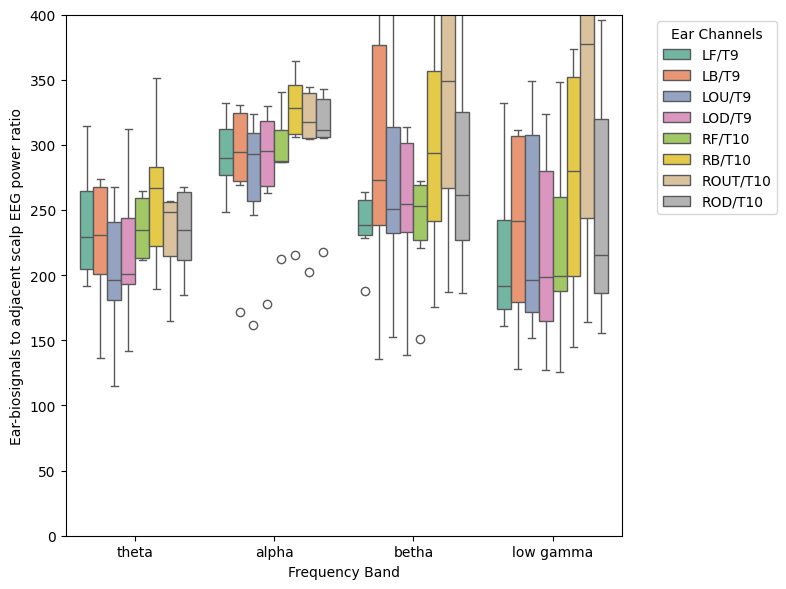

In [70]:
# Loop through the ear_scalp data and add to data_list
for band, values in ear_scalp.items():
    for idx, value in enumerate(values):
        ear_channel = ear_channels[idx % len(ear_channels)]  # Repeat the ear channels for each frequency band
        data_list.append([band, ear_channel, value])

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data_list, columns=['Frequency Band', 'Ear Channel', 'Power Ratio'])

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Frequency Band', y='Power Ratio', hue='Ear Channel', data=df, palette='Set2')

# Customize the plot
plt.ylabel('Ear-biosignals to adjacent scalp EEG power ratio')
plt.ylim(0, 400)  # Adjust the y-axis limits based on your data if necessary
plt.legend(title='Ear Channels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

plot ear motor

In [71]:
ear_motor_chs = ['LF/C3', 'LB/C3', 'LOU/C3', 'LOD/C3', 'RF/C4', 'RB/C4', 'ROU/C4', 'ROD/C4']

In [74]:
data_list

[]

In [73]:
data_list = []

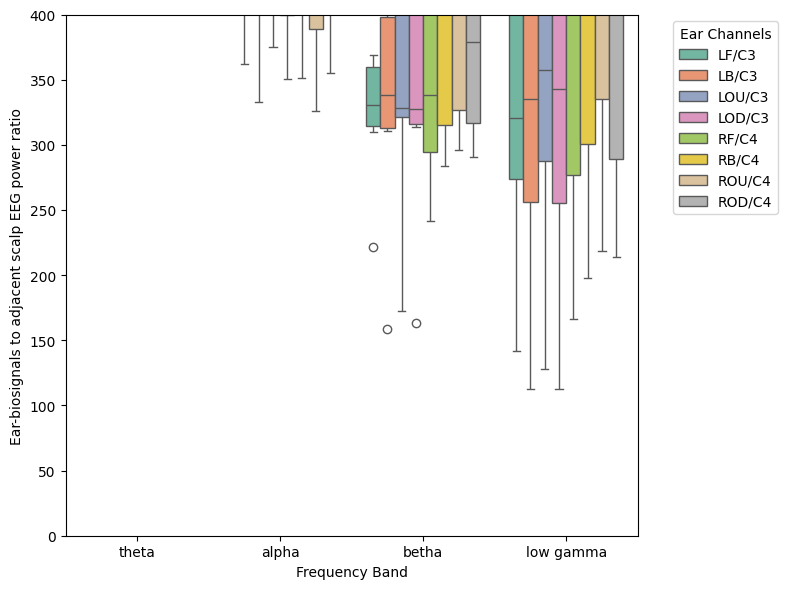

In [75]:
# Loop through the ear_scalp data and add to data_list
for band, values in ear_motor.items():
    for idx, value in enumerate(values):
        ear_channel = ear_motor_chs[idx % len(ear_motor_chs)]  # Repeat the ear channels for each frequency band
        data_list.append([band, ear_channel, value])

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data_list, columns=['Frequency Band', 'Ear Channel', 'Power Ratio'])

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Frequency Band', y='Power Ratio', hue='Ear Channel', data=df, palette='Set2')

# Customize the plot
plt.ylabel('Ear-biosignals to adjacent scalp EEG power ratio')
plt.ylim(0, 400)  # Adjust the y-axis limits based on your data if necessary
plt.legend(title='Ear Channels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

calculate pearson correlation between **in-ear** and **scalp** and **motor** channels

In [55]:
ear_channels = ['LF','LB','LOU','LOD','RF','RB','ROU','ROD']
other = ['T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10','LF','LB','LOU','LOD','RF','RB','ROU','ROD']
correlations = []
for sbj in clean_epochs:
    tmp = []
    for ear in ear_channels:
        ear_data = sbj.get_data(picks=[ear])
        for ch in other:
            scalp_data = sbj.get_data(picks=[ch])
            corr, _ = pearsonr(ear_data, scalp_data)
            tmp.append(corr)
    correlations.append(np.array(tmp))
correlations = np.array(correlations)

In [64]:
correlations.shape

(6, 152, 1, 2001)

**Permution test**

In [23]:
motor_channels = ['C3', 'C4']

In [24]:
num_permution = 10

In [25]:
permuted_correlations = np.zeros((6, len(ear_channels), len(motor_channels), num_permution))

In [26]:
permuted_correlations.shape

(6, 8, 2, 10)

In [27]:
# subject = 0
# for epoch in clean_epochs:
#     for permution in range(num_permution):
#         epoch_copy = epoch.copy()
#         epoch_copy._data = np.random.permutation(epoch_copy.get_data())
#         for i, in_ear_ch in enumerate(ear_channels):
#             for j, motor_ch in enumerate(motor_channels):
#                 in_ear_data = epoch_copy.get_data(picks=[in_ear_ch]).ravel()
#                 motor_data = epoch_copy.get_data(picks=[motor_ch]).ravel()
#                 permuted_corr, _ = pearsonr(in_ear_data, motor_data)
#                 permuted_correlations[subject, i, j, permution] = permuted_corr
#     subject += 1

In [28]:
p_values = {}
observed_correlations = {}

In [29]:
epoch_copy = clean_epochs[0].copy()
for i, in_ear_ch in enumerate(ear_channels):
    p_values[in_ear_ch] = {}
    observed_correlations[in_ear_ch] = {}
    for j, motor_ch in enumerate(motor_channels):
        in_ear_data = epoch_copy.get_data(picks=[in_ear_ch])
        motor_data = epoch_copy.get_data(picks=[motor_ch])
        # Calculate observed correlation
        observed_corr = pearsonr(in_ear_data.ravel(), motor_data.ravel())[0]
        observed_correlations[in_ear_ch][motor_ch] = observed_corr
        # Perform permutation test
        perm_test_result = permutation_test(
            data=(in_ear_data, motor_data),
            statistic=calc_pearson_corr,
            vectorized=False,
            n_resamples=100,
            alternative='two-sided'
        )
        # Store p-value
        p_values[in_ear_ch][motor_ch] = perm_test_result.pvalue

In [30]:
observed_correlations

{'LF': {'C3': -0.0007065683815221342, 'C4': -0.002266194561674083},
 'LB': {'C3': -0.0009119096740704763, 'C4': -0.0027244027856115657},
 'LOU': {'C3': -0.000828584626615553, 'C4': -0.0031608294525883895},
 'LOD': {'C3': -0.0009750973627862487, 'C4': -0.0029421631121759138},
 'RF': {'C3': -0.0022153076073480288, 'C4': -0.0016688612067300645},
 'RB': {'C3': -0.006667837713586108, 'C4': -0.004834866134275631},
 'ROU': {'C3': -0.002492121849426746, 'C4': -0.0015508879261253},
 'ROD': {'C3': -0.0007661951500670377, 'C4': -0.0005690316698566038}}

In [32]:
oc_df = pd.DataFrame(observed_correlations)

In [81]:
oc_df

,LF,LB,LOU,LOD,RF,RB,ROU,ROD
C3,-0.000707,-0.000912,-0.000829,-0.000975,-0.002215,-0.006668,-0.002492,-0.000766
C4,-0.002266,-0.002724,-0.003161,-0.002942,-0.001669,-0.004835,-0.001551,-0.000569


<Axes: >

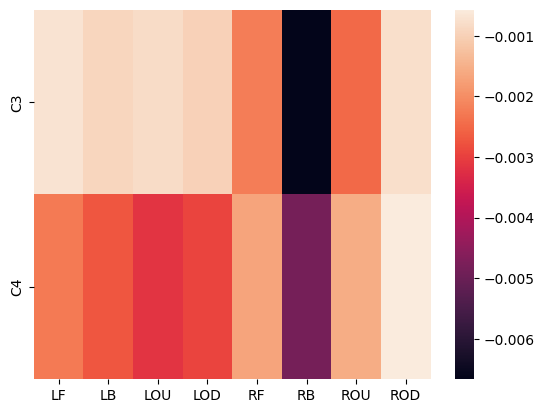

In [83]:
sns.heatmap(oc_df)

In [31]:
p_values

{'LF': {'C3': array([[0.97029703, 0.89108911, 0.63366337, ..., 0.27722772, 0.27722772,
          0.2970297 ]]),
  'C4': array([[0.99009901, 0.79207921, 0.45544554, ..., 0.79207921, 0.89108911,
          0.89108911]])},
 'LB': {'C3': array([[0.75247525, 0.63366337, 0.41584158, ..., 0.35643564, 0.35643564,
          0.35643564]]),
  'C4': array([[0.63366337, 0.43564356, 0.2970297 , ..., 0.43564356, 0.45544554,
          0.75247525]])},
 'LOU': {'C3': array([[0.85148515, 0.77227723, 0.59405941, ..., 0.35643564, 0.37623762,
          0.41584158]]),
  'C4': array([[0.51485149, 0.37623762, 0.21782178, ..., 0.3960396 , 0.4950495 ,
          0.73267327]])},
 'LOD': {'C3': array([[0.73267327, 0.67326733, 0.53465347, ..., 0.37623762, 0.3960396 ,
          0.45544554]]),
  'C4': array([[0.55445545, 0.3960396 , 0.15841584, ..., 0.41584158, 0.47524752,
          0.83168317]])},
 'RF': {'C3': array([[0.77227723, 0.75247525, 0.55445545, ..., 0.25742574, 0.41584158,
          0.47524752]]),
  'C4': ar

In [85]:
for key in p_values.keys():
    for sub_key in p_values[key].keys():
        p_values[key][sub_key] = np.mean(p_values[key][sub_key])

In [87]:
pv_df = pd.DataFrame(p_values)

In [88]:
pv_df

,LF,LB,LOU,LOD,RF,RB,ROU,ROD
C3,0.479280,0.477039,0.502447,0.469201,0.518889,0.481002,0.467350,0.520200
C4,0.548251,0.514085,0.480309,0.459701,0.487984,0.598038,0.495341,0.535321


<Axes: >

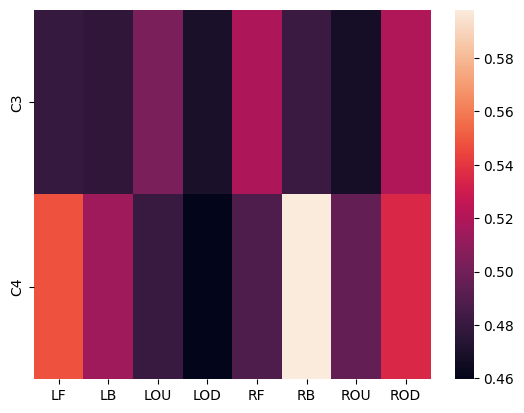

In [89]:
sns.heatmap(pv_df)